# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions using your Python and Data Science skills!

## Data and Setup

____
**Import numpy and pandas**

In [ ]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Read in the csv file as a dataframe called df**

In [ ]:
df = pd.read_csv('/content/911.csv')

**Check the info() of the df**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17022 entries, 0 to 17021
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        17022 non-null  float64
 1   lng        17022 non-null  float64
 2   desc       17022 non-null  object 
 3   zip        14806 non-null  float64
 4   title      17022 non-null  object 
 5   timeStamp  17022 non-null  object 
 6   twp        17014 non-null  object 
 7   addr       16906 non-null  object 
 8   e          17021 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


**Head of df**

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1.0
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1.0
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1.0
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1.0
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1.0


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [ ]:
df['zip'].value_counts().head(5)

,count
zip,
19401.0,4849
19464.0,4567
19403.0,3307
19446.0,3213
19406.0,2187


**What are the top 5 townships (twp) for 911 calls?**

In [ ]:
df['twp'].value_counts().head(5)

,count
twp,
LOWER MERION,5651
ABINGTON,4114
NORRISTOWN,4105
UPPER MERION,3575
CHELTENHAM,3107


**Take a look at the 'title' column, how many unique title codes are there?**

In [ ]:
df['title'].nunique()

105

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [ ]:
df['Reason'] = df['title'].astype(str).apply(lambda title: title.split(':')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [ ]:
df['Reason'].value_counts()

,count
Reason,
EMS,33381
Traffic,24746
Fire,9983
nan,1


**Now use seaborn to create a countplot of 911 calls by Reason.**

<ipython-input-22-71e1389a5e74>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Reason', data=df, palette='viridis')


<Axes: xlabel='Reason', ylabel='count'>

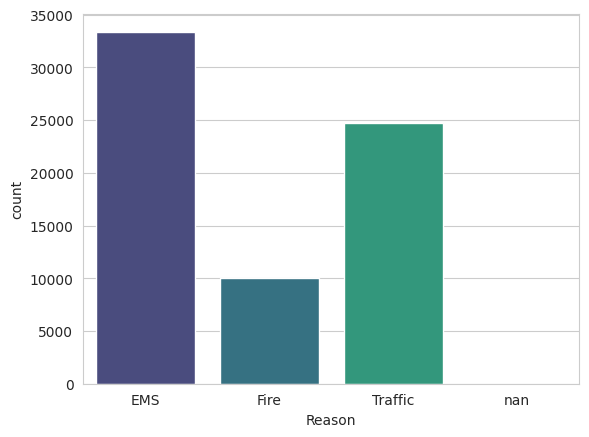

In [ ]:
sns.countplot(x='Reason', data=df, palette='viridis')

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [ ]:
type(df['timeStamp'].iloc[0])

str

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [ ]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day of Week'] = df['Day of Week'].map(dmap)

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

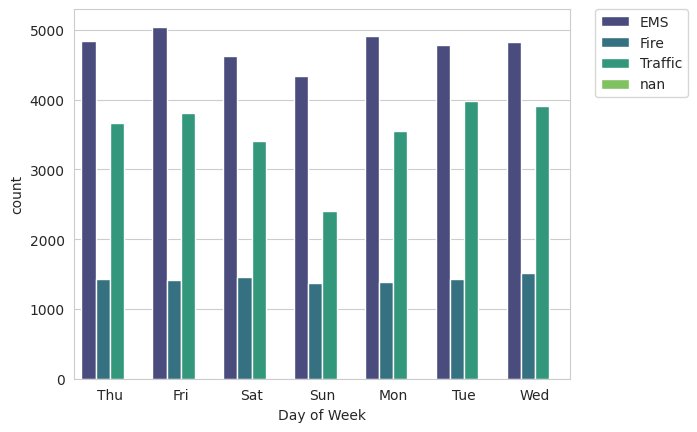

In [ ]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

<Axes: xlabel='Month', ylabel='count'>

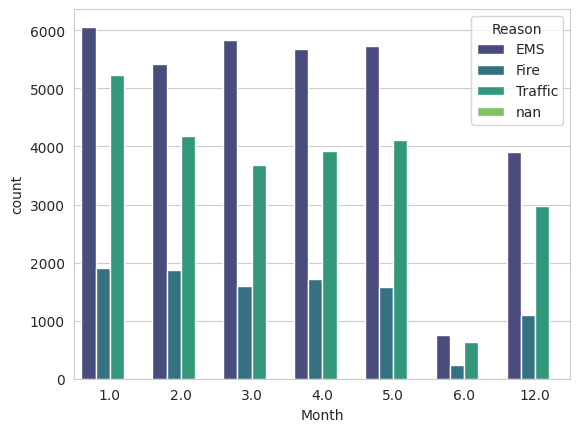

In [ ]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

**Did you notice something strange about the Plot?**

_____

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1.0,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2.0,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3.0,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4.0,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5.0,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

<Axes: xlabel='Month'>

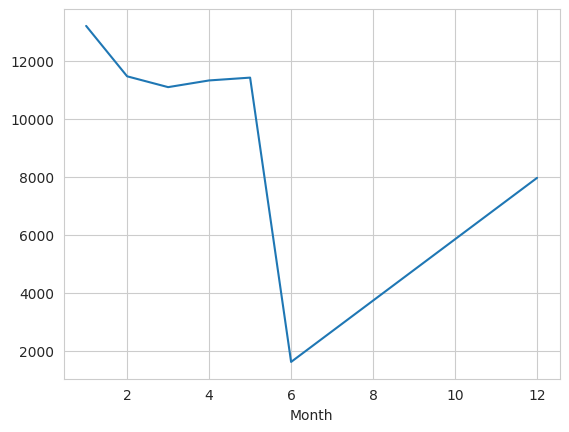

In [ ]:
byMonth['twp'].plot()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

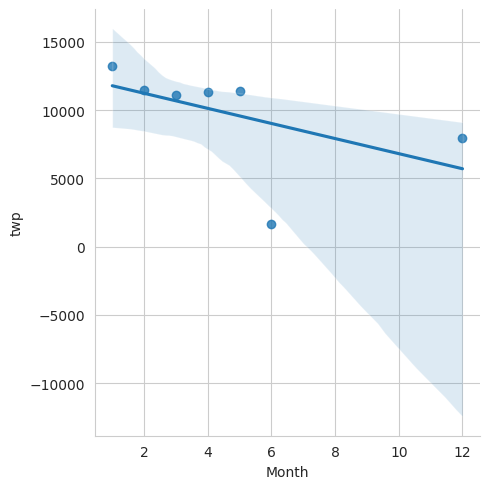

In [ ]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

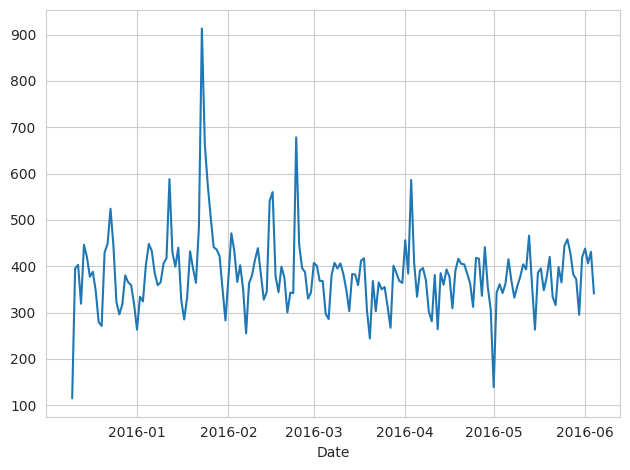

In [ ]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()


**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [ ]:
df['Reason'].value_counts()

,count
Reason,
EMS,33381
Traffic,24746
Fire,9983
nan,1


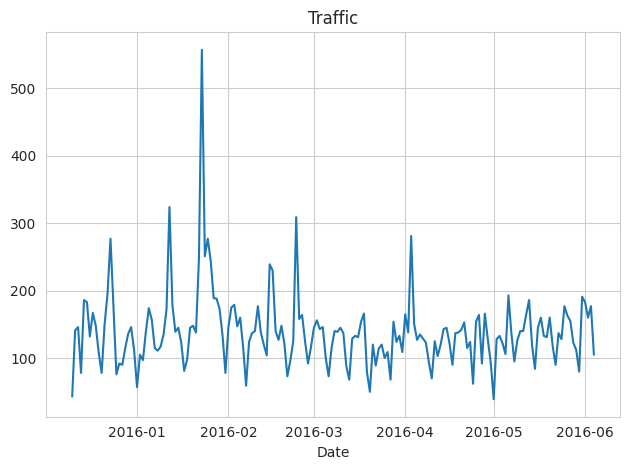

In [ ]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

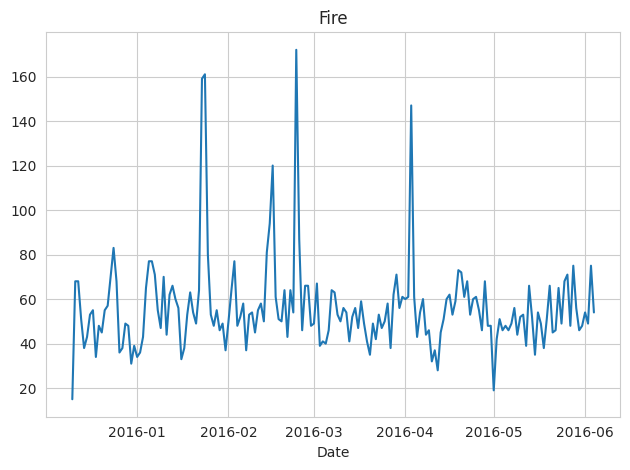

In [ ]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

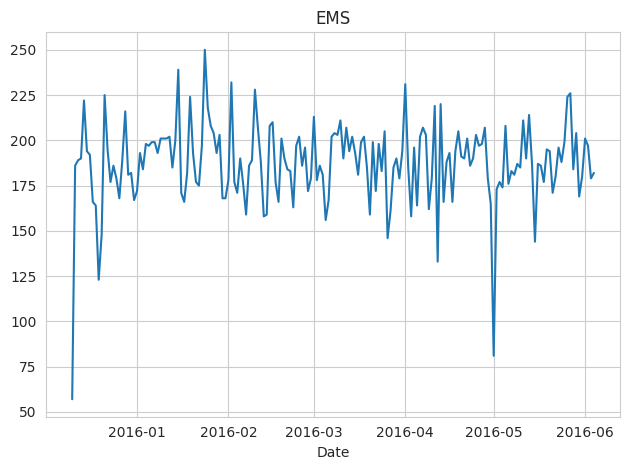

In [ ]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [ ]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,180,167,140,122,146,135,246,412,533,526,...,650,654,676,701,596,486,468,394,379,329
Mon,196,154,146,128,134,190,292,479,534,510,...,561,606,665,685,593,477,374,321,313,224
Sat,259,223,182,190,170,163,203,296,329,446,...,554,536,603,529,566,480,433,387,352,329
Sun,269,188,195,175,158,174,212,285,351,439,...,452,445,434,477,445,417,351,298,269,218
Thu,209,137,153,108,125,131,265,388,535,604,...,587,650,587,678,578,511,450,384,279,240


**Now create a HeatMap using this new DataFrame.**

<Axes: xlabel='Hour', ylabel='Day of Week'>

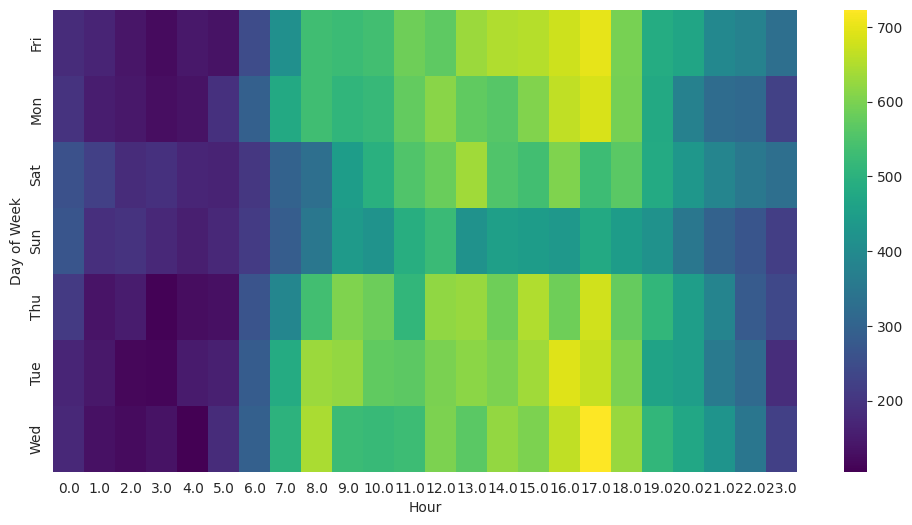

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

**Now create a clustermap using this DataFrame.**

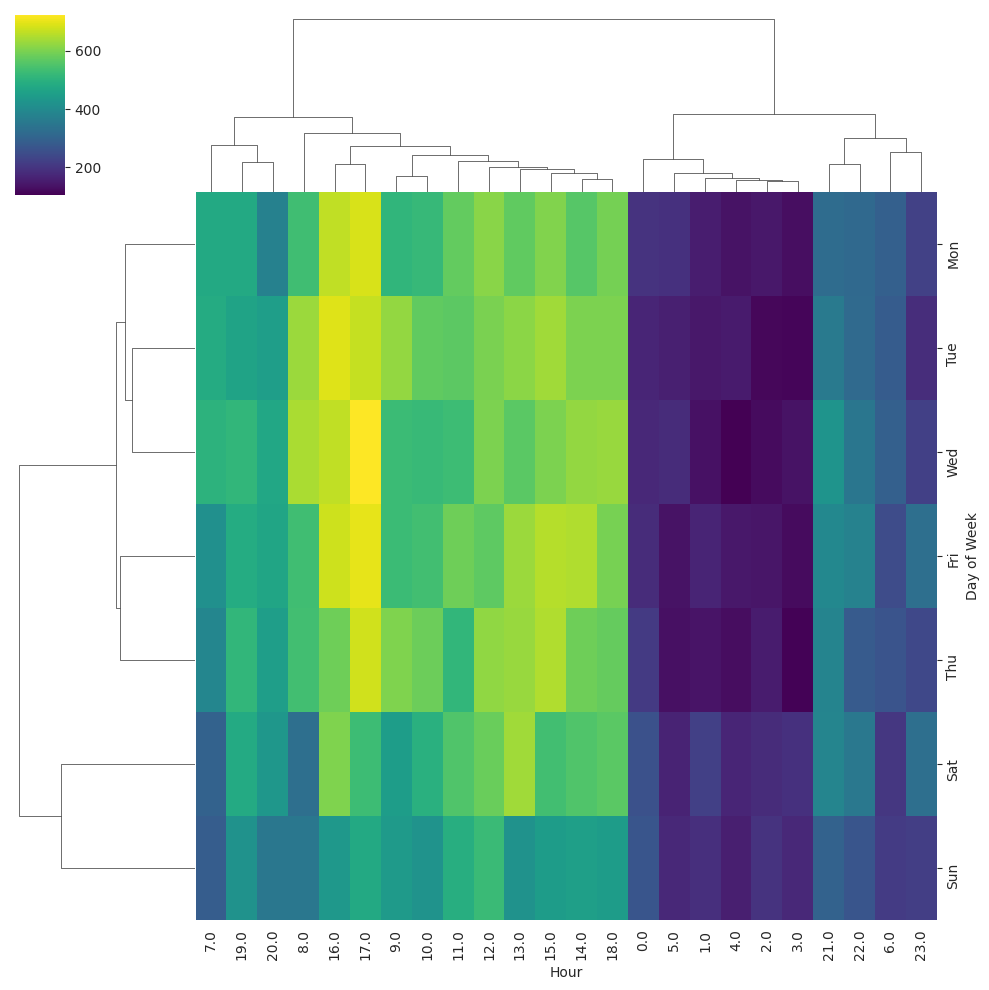

In [ ]:
sns.clustermap(dayHour, cmap='viridis')

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [ ]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1.0,2.0,3.0,4.0,5.0,6.0,12.0
Day of Week,,,,,,,
Fri,1970.0,1581.0,1525.0,1958.0,1730.0,431.0,1065.0
Mon,1727.0,1964.0,1535.0,1598.0,1779.0,NaN,1257.0
Sat,2291.0,1441.0,1266.0,1734.0,1444.0,341.0,978.0
Sun,1960.0,1229.0,1102.0,1488.0,1424.0,NaN,907.0
Thu,1584.0,1596.0,1900.0,1601.0,1590.0,406.0,1266.0


<Axes: xlabel='Month', ylabel='Day of Week'>

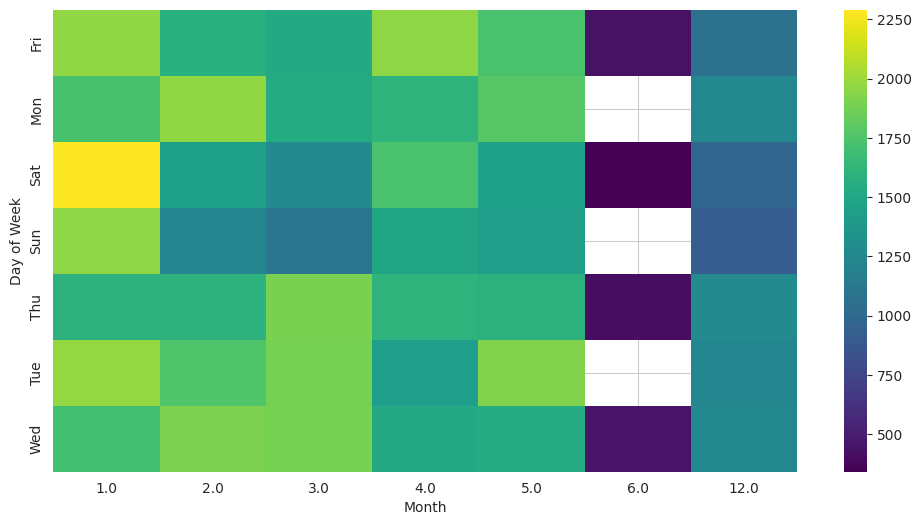

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

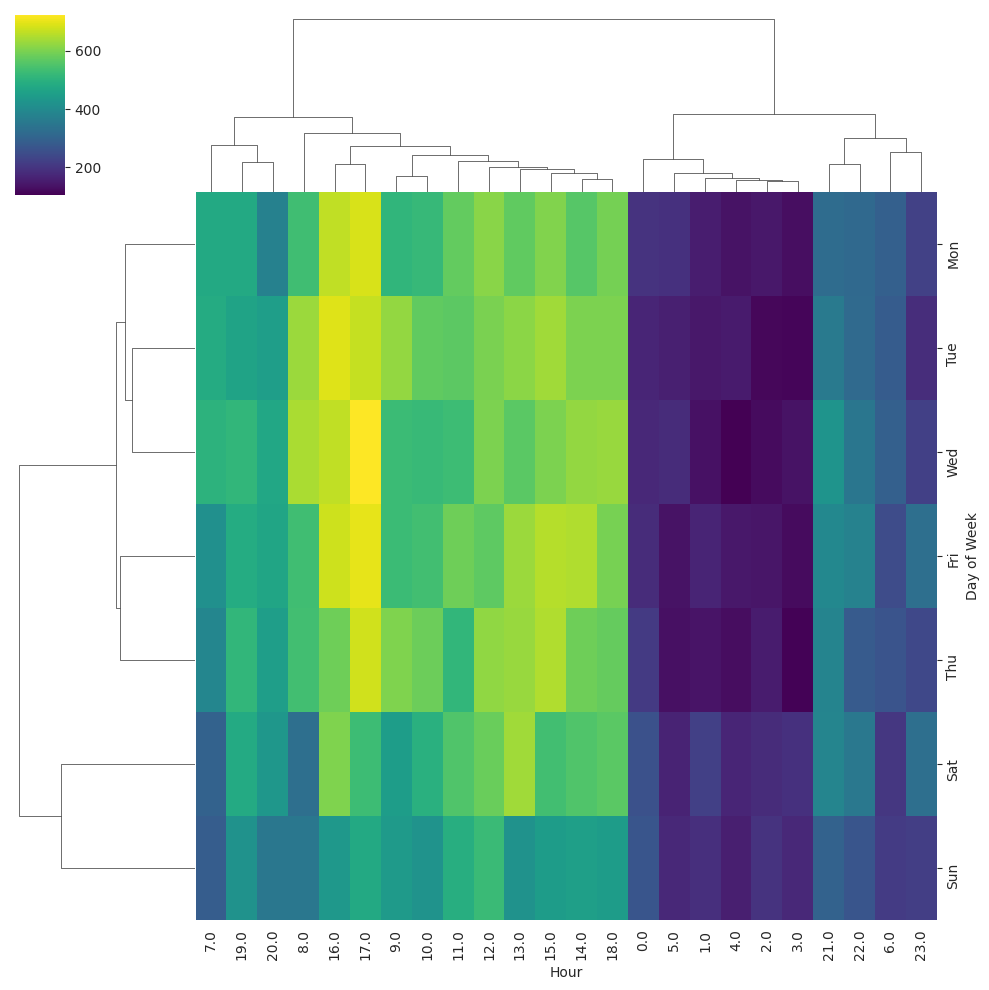

In [ ]:
sns.clustermap(dayHour, cmap='viridis')